<a href="https://colab.research.google.com/github/comptech-winter-school/covid19-prediction/blob/visualization/Create_Vizual_Ds_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
ALL_DATA = "https://raw.githubusercontent.com/AntonioWanderer/covid19-prediction/visualization/graph.csv"
COORDS="https://raw.githubusercontent.com/AntonioWanderer/covid19-prediction/visualization/coords.csv"

In [3]:
df=pd.read_csv(ALL_DATA, error_bad_lines=False,sep=";")
coords=pd.read_csv(COORDS)
df.head()

,Country1,Country2,Lag,Degree_of_certainty
0,Afghanistan,Albania,-100,0.329855
1,Afghanistan,Algeria,38,0.754405
2,Afghanistan,Argentina,-29,0.663128
3,Afghanistan,Armenia,99,0.265069
4,Afghanistan,Australia,99,-0.063636


In [4]:
coords.head()

,Unnamed: 0,Country_Region,Confirmed,Lat,Long_
0,0,Afghanistan,160692.0,33.93911,67.709953
1,1,Albania,251015.0,41.15330,20.168300
2,2,Algeria,243568.0,28.03390,1.659600
3,3,Andorra,35028.0,42.50630,1.521800
4,4,Angola,97812.0,-11.20270,17.873900


In [5]:
countries1 = df.merge(coords, left_on="Country1", right_on="Country_Region", how="inner").drop(["Confirmed", "Country_Region","Unnamed: 0"], axis=1)
rus1=countries1[countries1["Country2"] == "Russia"]
rus1.head()

,Country1,Country2,Lag,Degree_of_certainty,Lat,Long_
90,Afghanistan,Russia,99,0.144013,33.93911,67.709953
206,Albania,Russia,-60,0.723340,41.15330,20.168300
321,Algeria,Russia,99,0.482765,28.03390,1.659600
435,Argentina,Russia,99,0.442892,-38.41610,-63.616700
548,Armenia,Russia,24,0.583083,40.06910,45.038200


In [6]:
countries2 = df.merge(coords, left_on="Country2", right_on="Country_Region", how="inner").drop(["Confirmed", "Country_Region","Unnamed: 0"], axis=1)
rus2=countries2[countries2["Country1"] == "Russia"]
rus2.head()

,Country1,Country2,Lag,Degree_of_certainty,Lat,Long_
4277,Russia,Rwanda,-100,0.658055,-1.940300,29.873900
4369,Russia,Saudi Arabia,-100,-0.135410,23.885942,45.079162
4462,Russia,Serbia,-21,0.625687,44.016500,21.005900
4556,Russia,Singapore,-17,0.620307,1.283300,103.833300
4651,Russia,Slovakia,23,0.784416,48.669000,19.699000


In [25]:
rus1.rename(columns={'Country1':'Country','Country2':'Main'},inplace=True)
rus2.rename(columns={'Country2':'Country','Country1':'Main'},inplace=True)
Country_list=pd.concat([rus1,rus2],axis=0)
Country_list.sample(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Main,Lag,Degree_of_certainty,Lat,Long_
6532,Vietnam,Russia,36,0.740722,14.058324,108.277199
2690,Croatia,Russia,-13,0.674572,45.100000,15.200000
5930,Morocco,Russia,80,0.655876,31.791700,-7.092600
5762,Uganda,Russia,-63,0.432477,1.373333,32.290275
4461,Iran,Russia,83,0.737052,32.427908,53.688046
6315,Panama,Russia,-26,0.290078,8.538000,-80.782100
1926,Burma,Russia,91,0.660318,21.916200,95.956000
5498,Libya,Russia,92,0.762064,26.335100,17.228331
3306,Egypt,Russia,-100,0.464157,26.820553,30.802498
5869,Ukraine,Russia,-6,0.646696,48.843413,30.782937


In [26]:
Country_list.loc[Country_list['Degree_of_certainty'] < 0,'Degree_of_certainty'] = 0

Country_list['Degree_of_certainty'] = (Country_list['Degree_of_certainty']*9 + 1).apply(round)
Country_list['Degree_of_certainty']

90      2
206     8
321     5
435     5
548     6
       ..
6419    8
6532    8
6646    4
6761    5
6877    6
Name: Degree_of_certainty, Length: 117, dtype: int64

In [27]:
Country_list['Degree_of_certainty'].value_counts()

7    28
6    24
8    19
5    18
4    13
3     8
9     5
2     1
1     1
Name: Degree_of_certainty, dtype: int64

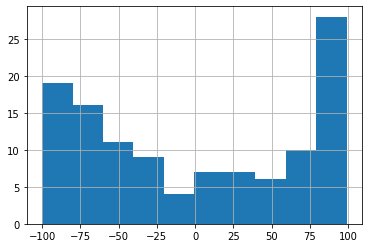

In [32]:
Country_list['Lag'].hist()

In [33]:
import numpy as np

Country_list['Lag'] = np.round(Country_list['Lag'] / 20)
Country_list['Lag']

90      5.0
206    -3.0
321     5.0
435     5.0
548     1.0
       ... 
6419   -5.0
6532    2.0
6646    4.0
6761    3.0
6877    1.0
Name: Lag, Length: 117, dtype: float64

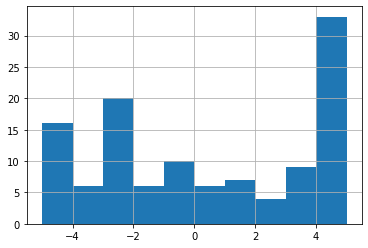

In [34]:
Country_list['Lag'].hist()

In [ ]:
Country_list.to_csv('Russia_relations.csv')

TypeError: ignored

In [ ]:
any(coords["COUNTRYAFF"] == "Russian Federation")

True

In [ ]:
!pip install fuzzywuzzy

In [ ]:
coords["COUNTRYAFF"]

0           United States
1           United States
2             New Zealand
3                  France
4             New Zealand
              ...        
244         United States
245                 Palau
246    Russian Federation
247                 Spain
248                 Spain
Name: COUNTRYAFF, Length: 249, dtype: object

In [ ]:
from fuzzywuzzy import fuzz, process

In [ ]:
def get_translate(one, two) -> dict:
  one_to_two = {}
  for word1 in one:
    candidates = []
    for word2 in two:
        candidates.append((word2, fuzz.ratio(word1, word2)))
    one_to_two[word1] = max(candidates, key=lambda x: x[1])[0]
  return one_to_two

In [ ]:
import numpy as np
get_translate(df["Country1"].unique(), coords["COUNTRYAFF"].unique())

In [ ]:
process.extractOne("Russia", coords["COUNTRYAFF"].unique(), scorer=fuzz.token_sort_ratio)

('Tunisia', 62)